
## Feature Explanations
- Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on .
- duration_ms: The duration of the track in milliseconds.
- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- audio_mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. 
- instrumentalness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
- audio_valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- song_popularity: Song ratings of spotify audience.
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data = pd.read_csv("data/song_data.csv")
info = pd.read_csv('data/song_info.csv')

In [121]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [122]:
data.shape

(18835, 15)

## Cleaning Dataa


In [123]:
data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

## Analysis


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [125]:
data.song_popularity = data.song_popularity.astype(float)
data.song_duration_ms = data.song_duration_ms.astype(float)
data.audio_mode = data.audio_mode.astype(float)
data.time_signature = data.time_signature.astype(float)


In [126]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [127]:
data.song_popularity

0        73.0
1        66.0
2        76.0
3        74.0
4        56.0
         ... 
18830    60.0
18831    60.0
18832    23.0
18833    55.0
18834    60.0
Name: song_popularity, Length: 18835, dtype: float64

In [128]:
data['popularity'] = [1 if i>=65 else 0 for i in data.song_popularity]
data['popularity'].value_counts()

0    12669
1     6166
Name: popularity, dtype: int64

In [129]:
#data.drop(['song_popularity'], axis=1, inplace=True)

In [130]:
data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.721783
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.000567
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.102599
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.104161
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.041023
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.165972
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.026675
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.026321
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.137704
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.005877


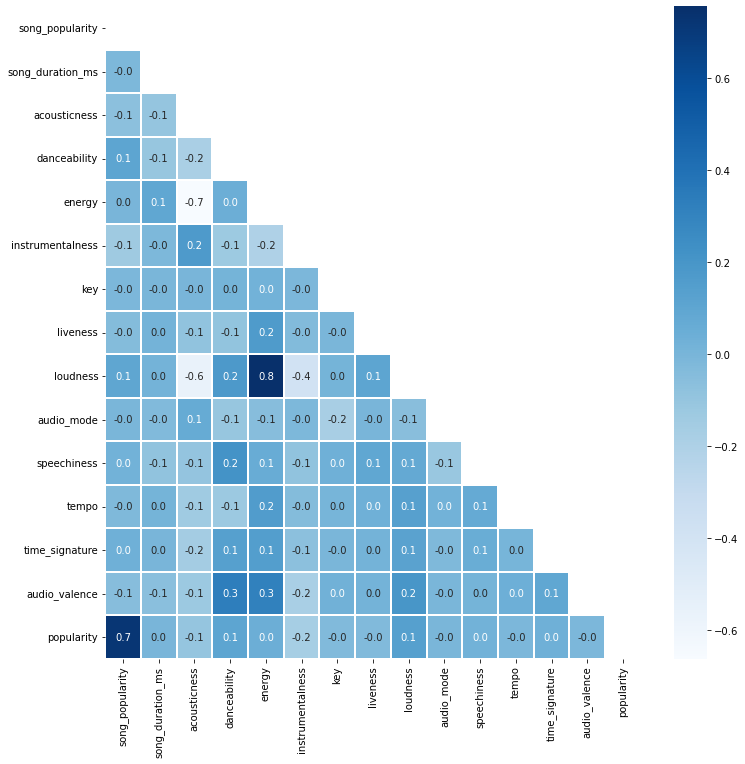

In [131]:
f, ax  =plt.subplots(figsize = (12,12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths = 0.4, linecolor = 'White', fmt = '.1f', ax = ax,cmap = 'Blues', mask = mask)
plt.show()

In [132]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    for c in features:
        Q1 = np.percentile(df[c],25) #1st quartile
        Q3 = np.percentile(df[c],75) #3rd quartile
        IQR = Q3-Q1
        outlier_step = IQR*1.5
        outlier_list = df[(df[c] < Q1 - outlier_step)| (df[c]> Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list)

    outlier_indices = Counter(outlier_indices)
    multiple_ouliers = list(i for i,v in outlier_indices.items() if v>2)
    return multiple_ouliers

In [133]:
data.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'popularity'],
      dtype='object')

In [134]:
data.loc[detect_outliers(data,['song_popularity','song_duration_ms','acousticness', 'danceability', 'energy', 'instrumentalness','key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'popularity'])]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
232,La Maza,58.0,351400.0,0.65200,0.555,0.331,0.000012,9,0.2350,-17.718,0.0,0.2700,170.603,3.0,0.437,0
253,Whole Lotta Love,77.0,333893.0,0.04840,0.412,0.902,0.131000,9,0.4050,-11.600,1.0,0.4050,89.740,4.0,0.422,1
284,Dazed And Confused,63.0,386373.0,0.04400,0.271,0.553,0.009600,2,0.0999,-9.526,1.0,0.0472,86.762,3.0,0.433,0
501,Do You Feel Like We Do,48.0,836666.0,0.04390,0.295,0.568,0.011700,0,0.9770,-8.232,1.0,0.0284,98.284,4.0,0.384,0
981,The Times They Are A-Changin' - Live at Sony M...,49.0,348560.0,0.63000,0.393,0.416,0.007910,9,0.9860,-13.243,1.0,0.0401,163.604,3.0,0.512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14654,All The Way Up (Remix),68.0,284830.0,0.09700,0.564,0.717,0.000000,10,0.4930,-6.403,0.0,0.3970,117.489,5.0,0.423,1
15113,Top Off,71.0,230712.0,0.01070,0.573,0.591,0.000000,11,0.4550,-6.715,0.0,0.3310,86.721,5.0,0.232,1
16173,Cops Shot The Kid,64.0,167907.0,0.02640,0.442,0.710,0.000000,7,0.6180,-5.142,1.0,0.6840,205.116,4.0,0.508,0
17034,More & More (feat. Jeezy),64.0,266400.0,0.00303,0.313,0.732,0.000000,4,0.7030,-4.456,0.0,0.3050,56.983,3.0,0.442,0


In [135]:
data = data.drop(detect_outliers(data,['song_popularity','song_duration_ms','acousticness', 'danceability', 'energy', 'instrumentalness','key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'popularity']))

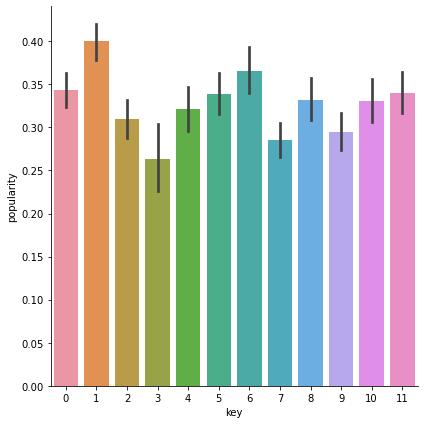

In [136]:
sns.catplot(x = 'key', y = 'popularity', data = data, kind = 'bar', height= 6)

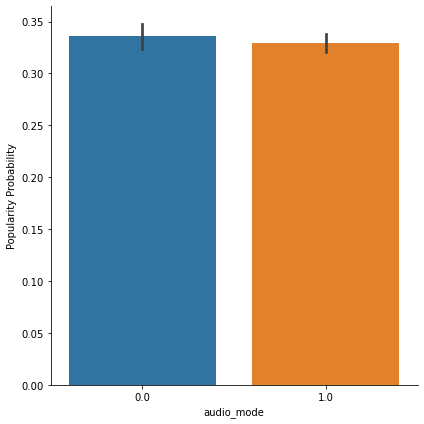

In [137]:
g = sns.factorplot(x = "audio_mode", y = "popularity", data = data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

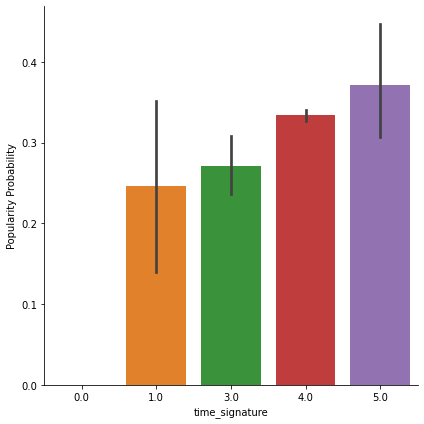

In [138]:
g = sns.factorplot(x = "time_signature", y = "popularity", data = data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

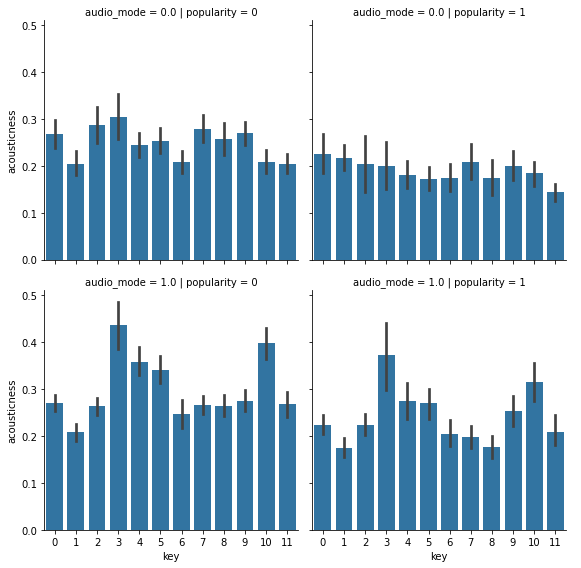

In [139]:
g = sns.FacetGrid(data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "acousticness")
g.add_legend()
plt.show()

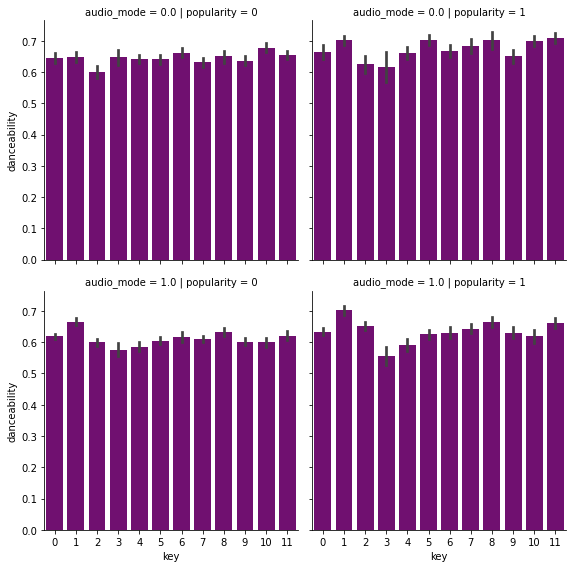

In [140]:
g = sns.FacetGrid(data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "danceability",color="purple")
g.add_legend()
plt.show()

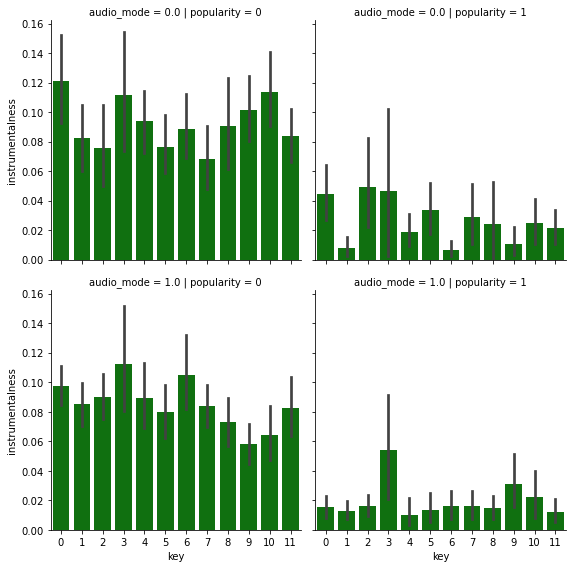

In [141]:
g = sns.FacetGrid(data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "instrumentalness",color="green")
g.add_legend()
plt.show()

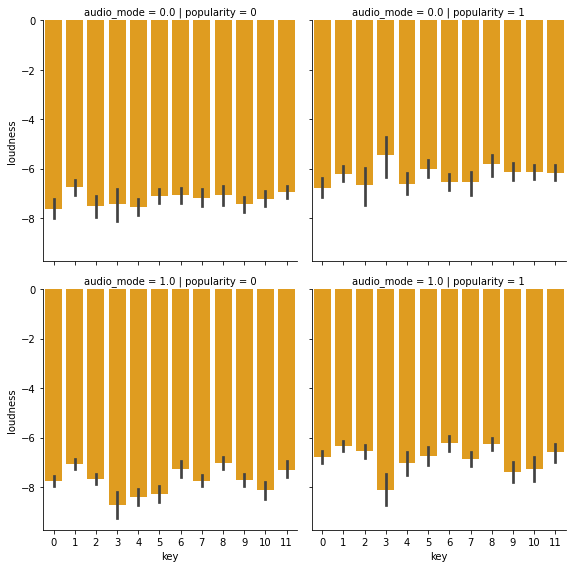

In [142]:
g = sns.FacetGrid(data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "loudness",color="orange")
g.add_legend()
plt.show()

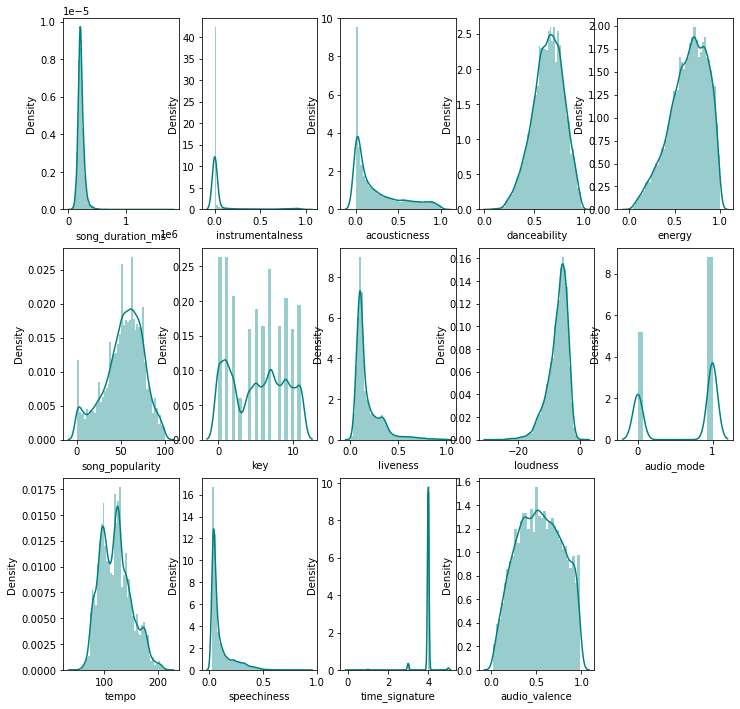

In [143]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

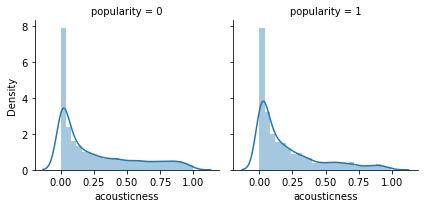

In [144]:
g = sns.FacetGrid(data, col = "popularity")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()

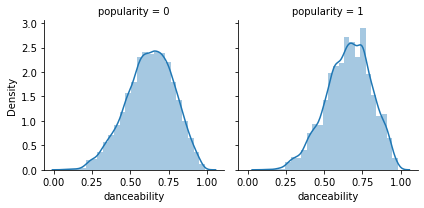

In [145]:
g = sns.FacetGrid(data, col = "popularity")
g.map(sns.distplot, "danceability", bins = 25)
plt.show()

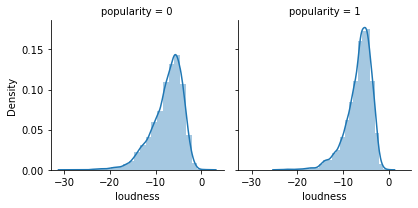

In [146]:
g = sns.FacetGrid(data, col = "popularity")
g.map(sns.distplot, "loudness", bins = 25)
plt.show()

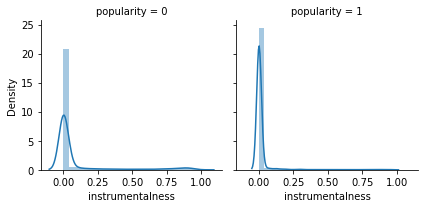

In [147]:
g = sns.FacetGrid(data, col = "popularity")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()

- Data distribution of songs display today's songs features like dancebility, energy, loudness and tempo are quite high. People like fast and loud music.
- According to instrumentalness, liveness and speechness, most of the songs are not live performances and they have lyrics.
- Keys like 0,1,5,6 and 11 seems more effective in songs. And if key== 0 or 1 or 6 song has more chance to be populer.
- Time_signure is mostly 4 and 5 in both populer and general data.
- If danceability>0.6 song has more chance to be popular.
- If loudness > -10 song has more chance to be popular.


> ## People like Happy Songs or Sad Songs?
- As we see in the feature explanations, audio valance describes the musical positiveness conveyed by a track (like sad or happiness - between 0 to 1). We supposed our threshold is 0.5.
- With this threshold we have happy songs more in the general data and the numbers are pretty close in the popular songs, but when we looked at top 500, we can say that negative songs are twice as much as positives.

In [148]:
data3 = data.copy()
data3['song_audio_valance'] = ['Happy' if i>=0.5 else 'Sad' for i in data.audio_valence]
data3['song_audio_valance'].value_counts()

Happy    10016
Sad       8354
Name: song_audio_valance, dtype: int64

In [149]:
new_data = pd.concat([info,data], axis = 1)


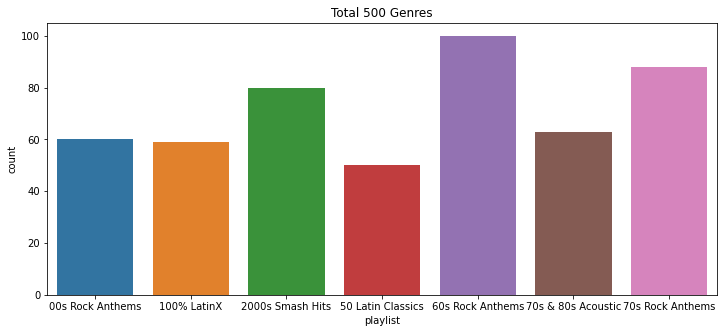

In [150]:
plt.figure(figsize=(12,5))
new_data = info['playlist'].head(500)
g = sns.countplot(new_data)
plt.title('Total 500 Genres')
plt.show()

## Feature Engineering

In [151]:
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,1
1,In The End,66.0,216933.0,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,1
2,Seven Nation Army,76.0,231733.0,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,1
3,By The Way,74.0,216933.0,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198,1
4,How You Remind Me,56.0,223826.0,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574,0


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18370 entries, 0 to 18834
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18370 non-null  object 
 1   song_popularity   18370 non-null  float64
 2   song_duration_ms  18370 non-null  float64
 3   acousticness      18370 non-null  float64
 4   danceability      18370 non-null  float64
 5   energy            18370 non-null  float64
 6   instrumentalness  18370 non-null  float64
 7   key               18370 non-null  int64  
 8   liveness          18370 non-null  float64
 9   loudness          18370 non-null  float64
 10  audio_mode        18370 non-null  float64
 11  speechiness       18370 non-null  float64
 12  tempo             18370 non-null  float64
 13  time_signature    18370 non-null  float64
 14  audio_valence     18370 non-null  float64
 15  popularity        18370 non-null  int64  
dtypes: float64(13), int64(2), object(1)
memo

In [153]:
"""data['key'] = data['key'].astype('category')
data = pd.get_dummies(data,columns=['key'])
data.head()"""

"data['key'] = data['key'].astype('category')\ndata = pd.get_dummies(data,columns=['key'])\ndata.head()"

In [154]:
"""data["audio_mode"] = data["audio_mode"].astype("category")
data = pd.get_dummies(data, columns=["audio_mode"])
data.head()"""

'data["audio_mode"] = data["audio_mode"].astype("category")\ndata = pd.get_dummies(data, columns=["audio_mode"])\ndata.head()'

In [155]:
"""data["time_signature"] = data["time_signature"].astype("category")
data = pd.get_dummies(data, columns=["time_signature"])
data.head()"""

'data["time_signature"] = data["time_signature"].astype("category")\ndata = pd.get_dummies(data, columns=["time_signature"])\ndata.head()'

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18370 entries, 0 to 18834
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18370 non-null  object 
 1   song_popularity   18370 non-null  float64
 2   song_duration_ms  18370 non-null  float64
 3   acousticness      18370 non-null  float64
 4   danceability      18370 non-null  float64
 5   energy            18370 non-null  float64
 6   instrumentalness  18370 non-null  float64
 7   key               18370 non-null  int64  
 8   liveness          18370 non-null  float64
 9   loudness          18370 non-null  float64
 10  audio_mode        18370 non-null  float64
 11  speechiness       18370 non-null  float64
 12  tempo             18370 non-null  float64
 13  time_signature    18370 non-null  float64
 14  audio_valence     18370 non-null  float64
 15  popularity        18370 non-null  int64  
dtypes: float64(13), int64(2), object(1)
memo

## Models

In [157]:
data.drop(['song_popularity','song_name'],axis=1,inplace=True)


In [158]:
data.isnull().any()

song_duration_ms    False
acousticness        False
danceability        False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
audio_mode          False
speechiness         False
tempo               False
time_signature      False
audio_valence       False
popularity          False
dtype: bool

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18370 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  18370 non-null  float64
 1   acousticness      18370 non-null  float64
 2   danceability      18370 non-null  float64
 3   energy            18370 non-null  float64
 4   instrumentalness  18370 non-null  float64
 5   key               18370 non-null  int64  
 6   liveness          18370 non-null  float64
 7   loudness          18370 non-null  float64
 8   audio_mode        18370 non-null  float64
 9   speechiness       18370 non-null  float64
 10  tempo             18370 non-null  float64
 11  time_signature    18370 non-null  float64
 12  audio_valence     18370 non-null  float64
 13  popularity        18370 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 2.6 MB


In [160]:
data.columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'popularity'],
      dtype='object')

In [161]:
def change_type(var):
    data[var] = data[var].astype(int)

In [167]:
data['popularity'] = data['popularity'].astype(int)

In [162]:
"""column = ['key_0', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'audio_mode_0.0', 'audio_mode_1.0', 'time_signature_0.0',
       'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0',
       'time_signature_5.0']
for i in column:
    change_type(i)"""

"column = ['key_0', 'key_1', 'key_2', 'key_3',\n       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',\n       'key_11', 'audio_mode_0.0', 'audio_mode_1.0', 'time_signature_0.0',\n       'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0',\n       'time_signature_5.0']\nfor i in column:\n    change_type(i)"

In [163]:
from pycaret.classification import *

In [170]:
setup(data=data,target='popularity',train_size=0.8,preprocess=False, fold_shuffle=True)

,Description,Value
0,session_id,5108
1,Target,popularity
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(18370, 14)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,2
8,Transformed Train Set,"(14696, 13)"
9,Transformed Test Set,"(3674, 13)"


(Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 5108,
 'box-cox',
 {'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0x7fb4c524e340>,
  'knn': <pycaret.containers.models.classification.KNeighborsClassifierContainer at 0x7fb4c524e3d0>,
  'nb': <pycaret.containers.models.classification.GaussianNBClassifierContainer at 0x7fb4c524ef40>,
  'dt': <pycaret.containers.models.classification.DecisionTreeClassifierContainer at 0x7fb451c00cd0>,
  'svm': <pycaret.containers.models.classification.SGDClassifierContainer at 0x7fb4c654ae50>,
  'rbfsvm': <pycaret.containers.models.classification.SVCClassifierContainer at 0x7fb47017e100>,
  'gpc': <pycaret.containers.models.classification.GaussianProcessClassifierContainer at 0x7fb47017e220>,
  'mlp': <pycaret.containers.models.classification.MLPClassifierContainer at 0x7fb47017e2e0>,
  'ridge': <pycaret.containers.models.classification.RidgeClassifierContainer at 0x7fb4c5291370>,
  '

In [171]:
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8548,0.8585,0.6051,0.9349,0.7342,0.6407,0.6696,0.6520
rf,Random Forest Classifier,0.8517,0.8638,0.6262,0.8961,0.7369,0.6382,0.6583,1.0010
catboost,CatBoost Classifier,0.7705,0.8055,0.4553,0.7576,0.5686,0.4253,0.4510,4.8190
dt,Decision Tree Classifier,0.7674,0.7561,0.7147,0.6332,0.6713,0.4924,0.4947,0.1250
gbc,Gradient Boosting Classifier,0.7049,0.7172,0.2395,0.6520,0.3500,0.2090,0.2530,1.2090
ada,Ada Boost Classifier,0.6869,0.6734,0.2349,0.5698,0.3326,0.1720,0.2009,0.6660
knn,K Neighbors Classifier,0.6838,0.6852,0.4566,0.5276,0.4894,0.2622,0.2637,0.0700
lda,Linear Discriminant Analysis,0.6713,0.6516,0.0619,0.5490,0.1109,0.0467,0.0901,0.0810
ridge,Ridge Classifier,0.6708,0.0000,0.0426,0.5570,0.0789,0.0337,0.0769,0.0200
lr,Logistic Regression,0.6678,0.4817,0.0000,0.0000,0.0000,0.0000,0.0000,1.5610


In [172]:
et = create_model('et')
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8401,0.8494,0.6004,0.8799,0.7138,0.6083,0.6297
1,0.8653,0.8863,0.6578,0.9119,0.7643,0.6734,0.6910
2,0.8680,0.8700,0.6701,0.9083,0.7712,0.6814,0.6970
3,0.8503,0.8649,0.6148,0.9036,0.7317,0.6331,0.6557
4,0.8633,0.8808,0.6524,0.9114,0.7604,0.6684,0.6867
5,0.8483,0.8557,0.6360,0.8736,0.7361,0.6333,0.6490
6,0.8448,0.8604,0.6189,0.8779,0.7260,0.6222,0.6407
7,0.8414,0.8436,0.5881,0.8997,0.7113,0.6084,0.6346
8,0.8339,0.8553,0.5779,0.8812,0.6980,0.5902,0.6152
9,0.8618,0.8714,0.6455,0.9130,0.7563,0.6638,0.6832


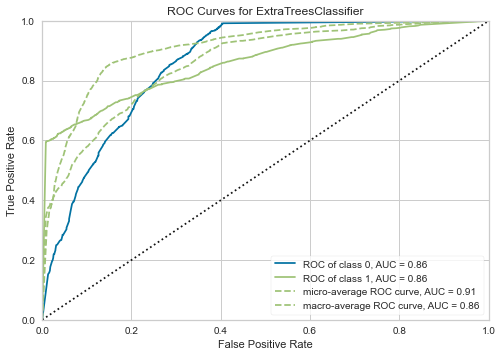

In [178]:
plot_model(et)


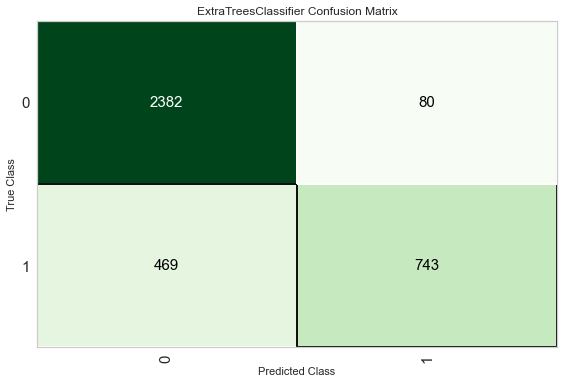

In [179]:
plot_model(et,plot='confusion_matrix')

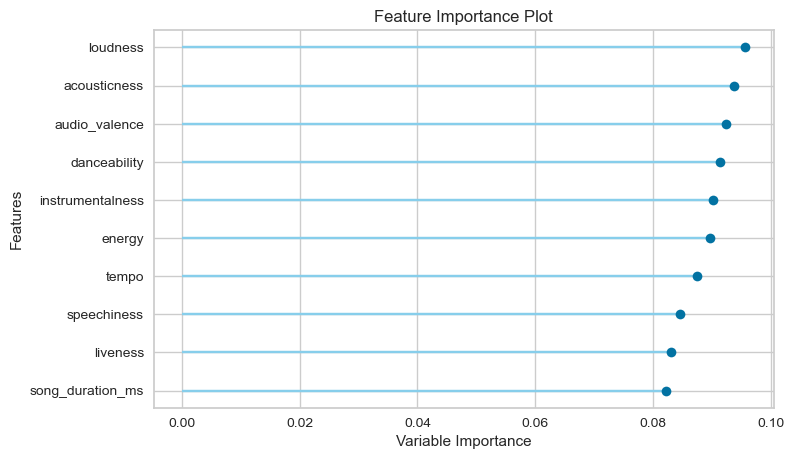

In [180]:
plot_model(et, plot = 'feature')


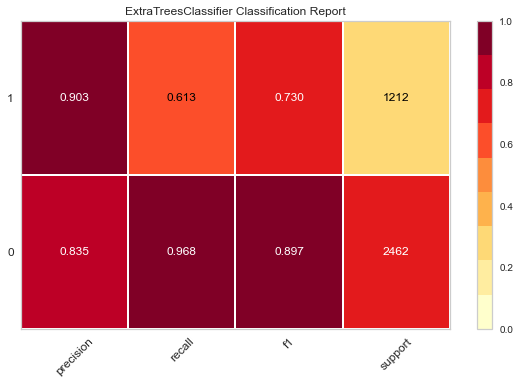

In [181]:
plot_model(et, plot = 'class_report')


In [182]:
evaluate_model(et)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…